In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [9]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target
#print('X=', X)

In [10]:
# Split into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter

#linear kernel
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X_train, y_train)

#rbf kernel
#svc = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X, y)

In [12]:
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

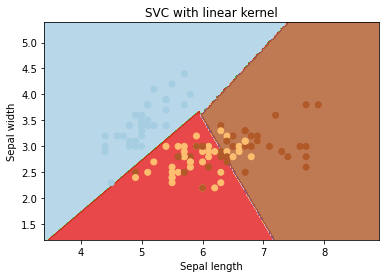

In [13]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()


In [14]:
# get support vectors
#print('support vectors=',svc.support_vectors_)

# get indices of support vectors
#print('indices of support vectors=',svc.support_)

# get number of support vectors for each class
print('number of support vectors for each class=',svc.n_support_)

number of support vectors for each class= [ 8 35 31]


In [15]:
from sklearn.metrics import accuracy_score

y_pred = svc.predict(X_test)
print('accuracy score=',accuracy_score(y_test,y_pred))

accuracy score= 0.9
